## Understanding MessagesState Reducer

The **reducer** is a crucial component in LangGraph that automatically manages state updates. For `MessagesState`, the reducer automatically **merges/concatenates** new messages with existing messages in the state. This means when a node returns `{"messages": [new_message]}`, the reducer automatically appends it to the existing messages list, maintaining conversation history without manual list concatenation.

**Key Importance:**
- **Automatic State Management**: No need to manually merge messages - the reducer handles it
- **Conversation History**: Ensures all messages are preserved across graph execution
- **Simplicity**: Nodes just return new messages, and the reducer merges them correctly


## Setup: Load API key


In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file with UTF-8 encoding
load_dotenv(encoding='utf-8')

# Get the API key from environment
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

## Initialize LLM


In [2]:
from langchain_openai import ChatOpenAI

# Create the LLM with explicit API key
llm = ChatOpenAI(model="gpt-4o", api_key=OPENAI_API_KEY)


## Define State class


In [ ]:
from langgraph.graph import MessagesState

# The class below is a placeholder in case we need to add extra state keys
# MessagesState already includes the messages reducer that auto-merges messages
class State(MessagesState):
    pass

## Create initial messages


In [4]:
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint

# Initial state
initial_messages = [
    AIMessage(content="Hello! How can I assist you?", name="Model"),
    HumanMessage(content="I'm looking for information on marine biology.", name="Lance"),
]

# New message to add
new_message = AIMessage(
    content="Sure, I can help with that. What specifically are you interested in?",
    name="Model"
)

# Build the initial state with all messages (manual append)
state = {
    "messages": initial_messages + [new_message]
}

## Define LLM node


In [5]:
def llm_node(state: MessagesState):
    # state["messages"] is the full history so far
    response = llm.invoke(state["messages"])
    # IMPORTANT: returning {"messages": [response]}
    # triggers the MessagesState reducer, which APPENDS
    return {"messages": [response]}

## Build and compile graph


In [ ]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("llm_node", llm_node)
builder.add_edge(START, "llm_node")
builder.add_edge("llm_node", END)

graph = builder.compile()

## Run graph and display results


In [10]:
final_state = graph.invoke(state)
for m in final_state["messages"]:
    m.pretty_print()


================================== Ai Message ==================================
Name: Model

Hello! How can I assist you?
================================ Human Message =================================
Name: Lance

I'm looking for information on marine biology.
================================== Ai Message ==================================
Name: Model

Sure, I can help with that. What specifically are you interested in?
================================== Ai Message ==================================

Sure, I can help with that. Marine biology is the study of life in the oceans and other saltwater environments such as estuaries and lagoons. It covers a wide range of subjects, including the behavior, physiology, and ecology of marine organisms, as well as their interactions with each other and their environments.

Here are some key topics within marine biology:

1. **Marine Organisms**: This includes everything from the smallest plankton to the largest whales. Marine biologists study 

## Visualize graph structure


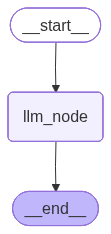

In [9]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))